# DS1000E Rigol Waveform Examples

**Scott Prahl**

**March 2020**

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

try:
    import RigolWFM.wfm as rigol

except:
    print("***** You need to install the module to read Rigol files first *****")
    print("***** Execute the following line in a new cell, then retry     *****")
    print()
    print("!{sys.executable} -m pip install RigolWFM")

## Introduction

This notebook illustrates shows how to extract signals from a `.wfm` file created by a the Rigol DS1000E scope.  It also validates that the process works by comparing with `.csv` and screenshots.

Two different `.wfm` files are examined one for the DS1052E scope and one for the DS1102E scope.  The accompanying `.csv` files seem to have t=0 in the zero in the center of the waveform. 

The list of Rigol scopes that should produce the same file format are:

In [2]:
print(rigol.DS1000E_scopes[:])

['E', '1000E', 'DS1000E', 'DS1102E', 'DS1052E']


## DS1052E

We will start with a `.wfm` file from a Rigol DS1052E scope. This test file accompanies [wfm_view.exe](http://meteleskublesku.cz/wfm_view/) a freeware program from <http://www.hakasoft.com.au>.  
The waveform looks like

<img src="https://github.com/scottprahl/RigolWFM/raw/main/wfm/DS1052E.png" width="50%">

Now let's look at plot of the data from the corresponding `.csv` file created by [wfm_view.exe](http://meteleskublesku.cz/wfm_view/)


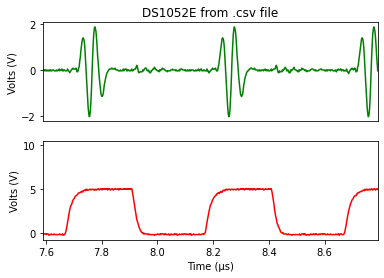

In [3]:
csv_filename_52 = "https://media.githubusercontent.com/media/scottprahl/RigolWFM/main/wfm/DS1052E.csv"
csv_data = np.genfromtxt(csv_filename_52, delimiter=',', skip_header=19, skip_footer=2, encoding='latin1').T

center_time = csv_data[0][-1]*1e6/2

plt.subplot(211)
plt.plot(csv_data[0]*1e6,csv_data[1], color='green')
plt.title("DS1052E from .csv file")
plt.ylabel("Volts (V)")
plt.xlim(center_time-0.6,center_time+0.6)
plt.xticks([])

plt.subplot(212)
plt.plot(csv_data[0]*1e6,csv_data[2], color='red')
plt.xlabel("Time (µs)")
plt.ylabel("Volts (V)")
plt.xlim(center_time-0.6,center_time+0.6)

plt.show()

### Now for the `.wfm` data

First a textual description.

In [4]:
help(rigol.Wfm.from_file)

Help on method from_file in module RigolWFM.wfm:

from_file(file_name, model, selected='1234') method of builtins.type instance
    Create Wfm object from a file.
    
    Args:
        file_name: name of file
        model: Rigol Oscilloscope used, e.g., 'E' or 'Z'
        selected: string of channels to process e.g., '12'
    Returns:
        a wfm object for the file



In [5]:
# raw=true is needed because this is a binary file
#wfm_url = "https://github.com/scottprahl/RigolWFM/raw/main/wfm/DS1052E.wfm" + "?raw=true"  
#w = rigol.Wfm.from_url(wfm_url, '1000E')

wfm_file = "/Users/prahl/Documents/Code/git/RigolWFM/wfm/DS1102E-D.wfm"

w = rigol.Wfm.from_file(wfm_file, 'E')

description = w.describe()
print(description)

    General:
        File Model   = wfm1000e
        User Model   = E
        Parser Model = wfm1000e
        Firmware     = unknown
        Filename     = DS1102E-D.wfm
        Channels     = [1, 2]

     Channel 1:
         Coupling =  unknown
            Scale =     2.00  V/div
           Offset =     2.40  V
            Probe =       1X
         Inverted =    False

        Time Base =  100.000 µs/div
           Offset =    0.000  s
            Delta =  400.000 ns/point
           Points =     8188

         Count    = [        1,        2,        3  ...      8187,     8188]
           Raw    = [       41,       41,       41  ...       110,      110]
           Times  = [-1.638 ms,-1.637 ms,-1.637 ms  ...  1.637 ms, 1.638 ms]
           Volts  = [  4.48  V,  4.48  V,  4.48  V  ...  -1.04  V, -1.04  V]

     Channel 2:
         Coupling =  unknown
            Scale =     5.00  V/div
           Offset =   -15.80  V
            Probe =       1X
         Inverted =    False

        Ti

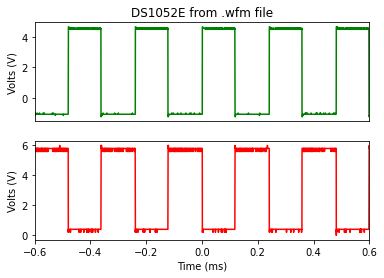

In [6]:
ch = w.channels[0]
plt.subplot(211)
plt.plot(ch.times*1e3, ch.volts, color='green')
plt.title("DS1052E from .wfm file")
plt.ylabel("Volts (V)")
plt.xlim(-0.6,0.6)

plt.xticks([])

ch = w.channels[1]
plt.subplot(212)
plt.plot(ch.times*1e3, ch.volts, color='red')
plt.xlabel("Time (ms)")
plt.ylabel("Volts (V)")
plt.xlim(-0.6,0.6)

plt.show()

## DS1102E-B

### First the `.csv` data

This file only has one active channel.  Let's look at what the accompanying `.csv` data looks like.

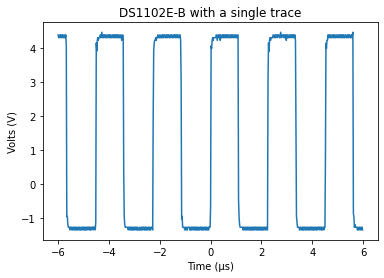

In [7]:
csv_filename = "https://github.com/scottprahl/RigolWFM/raw/main/wfm/DS1102E-B.csv"

my_data = np.genfromtxt(csv_filename, delimiter=',', skip_header=2).T

plt.plot(my_data[0]*1e6, my_data[1])
plt.xlabel("Time (µs)")
plt.ylabel("Volts (V)")
plt.title("DS1102E-B with a single trace")
plt.show()

### Now for the `wfm` data

First let's have look at the description of the internal file structure. We see that only channel 1 has been enabled.

In [8]:
# raw=true is needed because this is a binary file
wfm_url = "https://github.com/scottprahl/RigolWFM/raw/main/wfm/DS1102E-B.wfm" + "?raw=true"  
w = rigol.Wfm.from_url(wfm_url, 'DS1102E')
description = w.describe()
print(description)

downloading 'https://github.com/scottprahl/RigolWFM/raw/main/wfm/DS1102E-B.wfm?raw=true'
    General:
        File Model   = wfm1000e
        User Model   = DS1102E
        Parser Model = wfm1000e
        Firmware     = unknown
        Filename     = DS1102E-B.wfm
        Channels     = [1]

     Channel 1:
         Coupling =  unknown
            Scale =     2.00  V/div
           Offset =     0.00  V
            Probe =       1X
         Inverted =    False

        Time Base =    1.000 µs/div
           Offset =    0.000  s
            Delta =   10.000 ns/point
           Points =    16380

         Count    = [        1,        2,        3  ...     16379,    16380]
           Raw    = [      142,      141,      141  ...        70,       70]
           Times  = [-81.900 µs,-81.890 µs,-81.880 µs  ... 81.890 µs,81.900 µs]
           Volts  = [ -1.20  V, -1.12  V, -1.12  V  ...   4.56  V,  4.56  V]




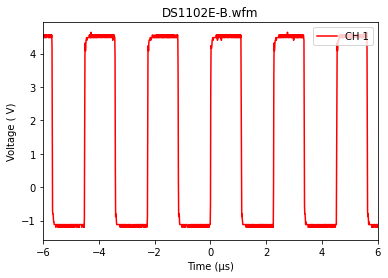

In [9]:
w.plot()
plt.xlim(-6,6)
plt.show()

## DS1102E-E

[Contributed by @Stapelberg](https://github.com/scottprahl/RigolWFM/issues/11#issue-718562669)

This file uses a 10X probe.  First let's have look at the description of the internal file structure. We see that only channel 1 has been enabled and it has a 10X probe.

In [10]:
# raw=true is needed because this is a binary file
wfm_url = "https://github.com/scottprahl/RigolWFM/raw/main/wfm/DS1102E-E.wfm" + "?raw=true"  
w = rigol.Wfm.from_url(wfm_url, 'DS1102E')
description = w.describe()
print(description)

downloading 'https://github.com/scottprahl/RigolWFM/raw/main/wfm/DS1102E-E.wfm?raw=true'
    General:
        File Model   = wfm1000e
        User Model   = DS1102E
        Parser Model = wfm1000e
        Firmware     = unknown
        Filename     = DS1102E-E.wfm
        Channels     = [1]

     Channel 1:
         Coupling =  unknown
            Scale =    10.00  V/div
           Offset =   -30.80  V
            Probe =      10X
         Inverted =    False

        Time Base =    5.000 ms/div
           Offset =   12.800 ms
            Delta =  200.000 ns/point
           Points =  1048572

         Count    = [        1,        2,        3  ...   1048571,  1048572]
           Raw    = [      132,      132,      132  ...       134,      134]
           Times  = [-92.057 ms,-92.057 ms,-92.057 ms  ... 117.657 ms,117.657 ms]
           Volts  = [ 28.80  V, 28.80  V, 28.80  V  ...  28.00  V, 28.00  V]




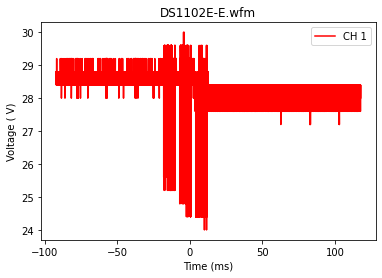

In [11]:
w.plot()
#plt.xlim(-6,6)
plt.show()